In [16]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
# from sage.graphs.graph_plot import GraphPlot
# from shapely.geometry import LineString
from copy import deepcopy
#from networkx.drawing.nx_pydot import graphviz_layout
from networkx.drawing.nx_agraph import graphviz_layout
from ipywidgets import HBox,VBox
from ipywidgets.widgets import IntSlider,Textarea,Label,interactive,Button, Dropdown
from matplotlib.ticker import AutoMinorLocator
from networkx.drawing.nx_agraph import graphviz_layout
from IPython.display import HTML

from matplotlib.patches import ConnectionStyle

from shutil import rmtree
import os
from IPython.display import display, FileLink

In [17]:
algoritmus=[u'The current flow. Create the Temporary Graph!',
           u'Is there a directed path in the Temporary Graph from S to T?',
           u'\t There is an augmenting path! Augment and go back to the start',
           u'\t There is NO augmenting path! Calculate the reachable vertices from S!',
           u'Calculate the size of the cut!']

In [18]:
def plot_all(index):
    return True

graph_select=Dropdown(
    options=[('ZH_2018/5',0)('Szabad',1)],
    value=0,
    description='Gráfválasztás:',
    layout={'width': 'max-content'},
    style={'description_width': 'initial'}
)

pelda_grafok={0:'S:A5,B2,C6,E9\n'
              1:''}
def trig(b):
    input_graph.value=pelda_grafok[graph_select.value]
graph_select.observe(trig ,names='value')
graph_select

In [19]:
# d_inc={'S':{'A':{'cap':5},'B':{'cap':2},'C':{'cap':6},'E':{'cap':9}},
#        'A':{'B':{'cap':5},'T':{'cap':4}},
#        'B':{'T':{'cap':10},'E':{'cap':2}},
#        'C':{'B':{'cap':3},'D':{'cap':3}},
#        'D':{'T':{'cap':5}},
#        'E':{'D':{'cap':6},'T':{'cap':2}}}
# G=nx.DiGraph(d_inc)
# print(G.nodes())
# G.get_edge_data('S','A')
# forras='S'
# nyelo='T'
# pos_G=nx.spring_layout(G)

In [20]:
def flow_value(f):
    return sum([f[(forras,u)] for u in G.neighbors(forras)])
def cut_value(X):
    return sum([G.get_edge_data(*e)['cap'] for e in G.edges if (e[0] in X) and (e[1] not in X)])

In [21]:
graph_select=Dropdown(
    options=[('Jegyzet 2.14', 0), ('Gy9/2',1),('Gy9/4',2),('Gy9/6',3),('Empty',4)],
    value=0,
    description='Graph picker:',
    layout={'width': 'max-content'},
    style={'description_width': 'initial'}
)
pelda_grafok={0:['S:A5,B2,C6,E9\nA:B5,T4\nB:T10,E2\nC:B3,D3\nD:T5\nE:D6,T2',{'S':(0,0),'A':(1,6),'B':(3,5),'C':(2,1.5),'D':(4,1.5),'E':(6,0),'T':(5,6)}],
              1:['S:A7,D2\nA:B2,F5\nB:C5,F2\nC:T6\nD:A4,E5\nE:A3,B3,F3\nF:C1,T3',{'S':(0,1),'A':(1,1),'B':(2,1),'C':(3,1),'D':(0,0),'E':(1,0),'F':(2,0), 'T':(3,0)}],
              2:['S:a11,d13,e4\na:b6,f7\nb:c9\nc:T14\nd:c2,e7\ne:b4,f5\nf:T13',{'S':(0,0),'a':(1,1),'b':(2,1),'c':(3,1),'d':(1,-1),'e':(2,-1),'f':(3,-1),'T':(4,0)}],
              3:['S:A15,B6,C3,F2\nA:D2,G9\nB:D3,C11\nC:F7,E9\nD:T5\nE:T21,D3\nF:E7,G4\nG:E4',{'S':(0,4),'A':(4,4),'F':(0,0),'G':(4,0),'T':(2,2),'B':(2,3.5),'C':(0.5,2),'D':(3.5,2),'E':(2,0.5)}],
              4:['',{}]
             }
input_graph_pos={}
def trig(b):
    global input_graph_pos
    input_graph.value=pelda_grafok[graph_select.value][0]
    input_graph_pos=pelda_grafok[graph_select.value][1]
graph_select.observe(trig ,names='value')
forras='S'
nyelo='T'

graph_select


Dropdown(description='Graph picker:', layout=Layout(width='max-content'), options=(('Jegyzet 2.14', 0), ('Gy9/…

In [22]:
label_graph = Label("Graph adjacency list+ Weights.\n Example:\n\tA:B1,C2,D5")
input_graph = Textarea(value=pelda_grafok[graph_select.value][0],layout={'height': '55mm'})
input_graph_pos=pelda_grafok[graph_select.value][1]
#input_graph = Textarea(value='S:A5,B2,C6,E9\nA:B5,T4\nB:T10,E2\nC:B3,D3\nD:T5\nE:D6,T2',layout={'height': '55mm'})

label_fonat = Label("Augmenting pathes.\n Example line: S,A,B,T:1")
input_fonat = Textarea(layout={'height': '55mm'})

input_display = HBox([VBox([label_graph,input_graph]),VBox([label_fonat,input_fonat])])

def textarea_reader(input_text,mode="fonat"):
    if mode=="fonat":
        if len(input_text)==0:
            return {}
        edgelist = []
        split = input_text.split("\n")
        for line in split:
            if len(line.split(':'))<2:
                print("Pay attention! Empty/long lines, colon?")
                #print("Figyelj a bemenetre! Üres/hosszú sorok, kettospont?")
                return
            else:
                a,k = line.split(":")
                #print(k)
                try:
                    k=int(k)
                    L=a.split(',')
                    edgelist+=[(L[i],L[i+1],k) for i in range(len(L)-1)]
                except:
                    print("Only integer is used for augmenting!")
                    #print("Egesz szammal novelunk csak")
                    return
        sf={(e[0],e[1]):0 for e in edgelist}
        for e in edgelist:
            sf[(e[0],e[1])]+=e[2]
        return sf
    if mode=="graph":
        if len(input_text)<4:
            print("Empty/short input!")
            #print("Üres/rövid bemenet!")
            return
        d_inc = {}
        split = input_text.split("\n")
        for elem in split:
            if ":" not in elem:
                print("Too short/empty line, is there colon?")
                #print("Túl rövid/üres sor, van kettőspont?")
                return
            a,b_dict = elem.split(":")
            if b_dict=="":
                b_dict={}
                d_inc[a]=b_dict
            else:
                try:
                    #b_list = [int(e) for e in b_list.split(",")]
                    b_dict = {e[0]:{'cap':int(e[1:])} for e in b_dict.split(",")}
                    d_inc[a]=b_dict
                except:
                    print("Bad format!")
                    #print("Rossz formátum!")
                    return
        return d_inc

In [23]:
def init_globals():
    
    d_inc = textarea_reader(input_graph.value,mode="graph")
#    d_inc={'S':{'A':{'cap':5},'B':{'cap':2},'C':{'cap':6},'E':{'cap':9}},
#       'A':{'B':{'cap':5},'T':{'cap':4}},
#       'B':{'T':{'cap':10},'E':{'cap':2}},
#       'C':{'B':{'cap':3},'D':{'cap':3}},
#       'D':{'T':{'cap':5}},
#       'E':{'D':{'cap':6},'T':{'cap':2}}}
    G=nx.DiGraph(d_inc)
    
    f_akt={e:0 for e in G.edges()}
    sf=textarea_reader(input_fonat.value,mode='fonat')
    #print(sf)
    for e in sf:
        f_akt[e]+=sf[e]
    return G, f_akt

In [24]:
input_display

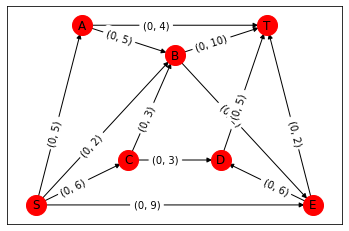

In [25]:
pos_G=input_graph_pos
G=init_globals()[0]
f_akt=init_globals()[1]

fig=plt.figure()
nx.draw_networkx_edges(G,pos=pos_G)
nx.draw_networkx_labels(G,pos=pos_G)
nx.draw_networkx_edge_labels(G,pos=pos_G,edge_labels={e:(f_akt[e],G.get_edge_data(*e)['cap']) for e in G.edges()},label_pos=0.6)
nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,node_color="red")
plt.show()
plt.close()

In [26]:
#f_akt={e:0 for e in G.edges()}
#print(f_akt)
#pos_G={'S':(0,0),'A':(1,6),'B':(3,5),'C':(2,1.5),'D':(4,1.5),'E':(6,0),'T':(5,6)}
pos_G=input_graph_pos
G=init_globals()[0]
f_akt=init_globals()[1]
b_found_alternating_path=True
counter=0
d_movie={}

while(b_found_alternating_path):
    d_temp={}
    #Aktualis flow abrazolasa
    d_temp["graph"]=(G,pos_G)
    d_temp['flow_value']=flow_value(f_akt)
    d_temp['akt_flow']=deepcopy(f_akt)
    d_temp["code_index"]=0
    d_movie[counter]=d_temp
    counter+=1

    #temp graf epitese
    d_temp=deepcopy(d_temp)
    
    d_temp_elek=[]
    H=nx.DiGraph()
    for e in G.edges:
        if G.get_edge_data(*e)['cap']>f_akt[e]:
            d_temp_elek.append((*e,{'gap':G.get_edge_data(*e)['cap']-f_akt[e],'color':'blue','elore':1,'original':e}))
            
        if f_akt[e]>0:
            d_temp_elek.append((e[1],e[0],{'gap': f_akt[e], 'color':'red','elore':-1,'original':e}))
    H.add_edges_from(d_temp_elek)
    
    d_temp['tempgraph']=(H,pos_G)
    d_temp['code_index']=1
    d_movie[counter]=d_temp
    counter+=1

#     
    #BFS az forras csucsbol
    d_temp=deepcopy(d_temp)
    Q=[forras]
    volt={u:False for u in H.nodes()}
    honnan={u:'*' for u in H.nodes()}
    volt[forras]=True
    while(len(Q)>0):
        akt=Q.pop(0)
        
        L_new=[v for v in H.neighbors(akt) if volt[v]==False]
        Q+=L_new
        for u in L_new:
            volt[u]=True
            honnan[u]=akt
    
    b_found_alternating_path=(nyelo in [u for u in volt if volt[u]])
    
    if(b_found_alternating_path):
        #Javito ut meghatarozasa es a javitas merteke
        L=[]
        akt=nyelo
        while(akt!='*'):
            L.append(akt)
            akt=honnan[akt]
        L.reverse()
        L_edges=[(L[i],L[i+1]) for i in range(len(L)-1)]
        
        augmenting_size=min([H.get_edge_data(*e)['gap'] for e in L_edges])
        

        d_temp['augmenting_path']=L_edges
        d_temp['augmenting_size']=augmenting_size
        d_temp['code_index']=2
        d_movie[counter]=d_temp
        counter+=1
        #Javitas
        for e in L_edges:            
            f_akt[H.get_edge_data(*e)['original']]+=H.get_edge_data(*e)['elore']*augmenting_size
    else:
        X=[u for u in H.nodes() if volt[u]]
        
       
        d_temp['cut']=X
        d_temp['code_index']=3
        d_movie[counter]=d_temp
        counter+=1
        
        
        d_temp=deepcopy(d_temp)
        d_temp={}
        d_temp["flow_value"] = flow_value(f_akt)
        d_temp['graph']=(G,pos_G)
        d_temp['cut']=X
        d_temp['code_index']=4
        d_temp["akt_flow"] = deepcopy(f_akt)
        d_movie[counter]=d_temp
        counter+=1
        d_temp=deepcopy(d_temp)
        d_temp['cut_value']=cut_value(X)
        d_temp['leaving_edges']=[e for e in G.edges if (e[0] in X) and (e[1] not in X)]
        d_movie[counter]=d_temp
        counter+=1
        


In [41]:
def plot_all(index):
    fig,ax = plt.subplots(2,2,figsize=(25,14))
    plt.subplots_adjust(wspace=0.05)
    
    G,pos_G = d_movie[index]["graph"]
    code_index = d_movie[index]["code_index"]    
    


    ax[0,0].set_axis_off()
    ax[1,0].set_axis_off()
    ax[0,1].set_axis_off()
    ax[1,1].set_axis_off()
    
    # graf
    nx.draw_networkx_edges(G,pos=pos_G,ax=ax[0,0])
    nx.draw_networkx_labels(G,pos=pos_G,ax=ax[0,0])
    nx.draw_networkx_edge_labels(G,pos=pos_G,
                                 edge_labels={e:(d_movie[index]["akt_flow"][e],
                                                 G.get_edge_data(*e)['cap']) for e in G.edges()},
                                 label_pos=0.7,
                                 font_size=14,
                                 ax=ax[0,0])
    nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,node_color="red",ax=ax[0,0])
    
    
    # jobb felso, algoritmus
    
    for i,line in enumerate(algoritmus):
        tab_offset=0.2
        dy=0.1
        starting_height=1
        fs = 17
        if i!=code_index:
            if line[0]=="\t":
                ax[0,1].annotate(line[1:],(0+tab_offset,starting_height-dy*i),fontsize=fs)
            else:
                ax[0,1].annotate(line,(0,starting_height-dy*i),fontsize=fs)
        else:
            if line[0]=="\t":
                ax[0,1].annotate(line[1:],(0+tab_offset,starting_height-dy*i),fontsize=fs,weight="bold")
            else:
                ax[0,1].annotate(line,(0,starting_height-dy*i),fontsize=fs,weight="bold")
    ax[0,1].set_ylim(0,1.2)
    
    if "flow_value" in d_movie[index]:
        ax[0,1].annotate("Current flow value: "+str(d_movie[index]["flow_value"]), 
            (0,starting_height-7*dy),fontsize=fs)
    
    # tempgraph
        # bal also
    if "tempgraph" in d_movie[index]:
        H,pos_H = d_movie[index]["tempgraph"]

        
        nx.draw_networkx_edges(H, pos=pos_H, 
                           connectionstyle="arc3,rad=0.1",
                           edge_color=[H.get_edge_data(*e)['color'] for e in H.edges()],
                           edge_labels={e:H.get_edge_data(*e)['gap'] for e in H.edges()},
                           label_pos=0.7,
                           font_size=14,
                           ax=ax[1,0])
        nx.draw_networkx_labels(H,pos=pos_H,ax=ax[1,0])
        nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,node_color="red",ax=ax[1,0])
    #     nx.draw_networkx_edge_labels(H,pos=pos_G,
    #                                   edge_labels={e:H.get_edge_data(*e)['gap'] for e in H.edges()},
    #                                   connectionstyle="arc3,rad=0.1",
    #                                   label_pos=0.7)

    if "augmenting_size" in d_movie[index]:
        ax[1,1].annotate("Augmenting size: "+str(d_movie[index]["augmenting_size"]) + ".",
            (0,starting_height-dy),fontsize=17)
        ax[1,1].annotate("Augmenting path: "+ ",".join([str(t) for t in d_movie[index]["augmenting_path"]]), 
            (0,starting_height-2*dy),fontsize=17)
        ax[1,1].set_ylim(0,1.2)


    #     print(javitas_merteke,':',L)
    
    # 2-es tempgraf
    
    # augmenting_path
    # augmenting_size
    # code_index
        L = list(set([n for t in d_movie[index]["augmenting_path"] for n in t]))
        L_edges = d_movie[index]["augmenting_path"]
    
        nx.draw_networkx_edges(G,pos=pos_G,ax=ax[0,0])
        nx.draw_networkx_labels(G,pos=pos_G,ax=ax[0,0])
        nx.draw_networkx_edge_labels(
            G,
            pos=pos_G,
            edge_labels={e:(d_movie[index]["akt_flow"][e],G.get_edge_data(*e)['cap']) for e in G.edges()},
            label_pos=0.7,font_size=14,ax=ax[0,0])
        nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,node_color="red",ax=ax[0,0])
    #         fig=plt.figure()
        nx.draw_networkx_edges(H, pos=pos_G, 
                           connectionstyle="arc3,rad=0.1",
                           edge_color=[H.get_edge_data(*e)['color'] for e in H.edges()],
                           edge_labels={e:H.get_edge_data(*e)['gap'] for e in H.edges()},
                           label_pos=0.7,ax=ax[1,0])
        nx.draw_networkx_labels(H,pos=pos_G,ax=ax[1,0])
        nx.draw_networkx_nodes(G,pos=pos_G,
                               nodelist=L,
                               node_size=400,node_color="lightgreen",ax=ax[1,0])
        nx.draw_networkx_nodes(G,pos=pos_G,
                               nodelist=[u for u in G.nodes() if u not in L],
                               node_size=400,node_color="red",ax=ax[1,0])
        nx.draw_networkx_edges(H, pos=pos_G, 
                           connectionstyle="arc3,rad=0.1",
                           edgelist=L_edges,
                           edge_color=[H.get_edge_data(*e)['color'] for e in L_edges],
                           edge_labels={e:H.get_edge_data(*e)['gap'] for e in L_edges},
                           width=5,
                           label_pos=0.7,ax=ax[1,0])
        nx.draw_networkx_edge_labels(H,pos=pos_G, edgelist=L_edges,
                                  edge_labels={e:H.get_edge_data(*e)['gap'] for e in L_edges},
                                  connectionstyle="arc3,rad=0.1",
                                  font_size=14,
                                  label_pos=0.7,ax=ax[1,0])

    
    if "cut" in d_movie[index]:
        # 3-as tipusu tempgraf, utolso fazis

        # vagas
        # code_index

        nx.draw_networkx_edges(G,pos=pos_G,ax=ax[0,0])
        nx.draw_networkx_labels(G,pos=pos_G,ax=ax[0,0])
        nx.draw_networkx_edge_labels(G,pos=pos_G,
                                     edge_labels={e:(d_movie[index]["akt_flow"][e],
                                                     G.get_edge_data(*e)['cap']) for e in G.edges()},
                                     label_pos=0.7,font_size=14,ax=ax[0,0])
        
        if "tempgraph" not in d_movie[index]:
            X = d_movie[index]["cut"]
            nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,nodelist=X,node_color="lightblue",ax=ax[0,0])
            nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,nodelist=[u for u in G.nodes() if u not in X],node_color="red",ax=ax[0,0])
        else:
            nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,node_color="red",ax=ax[0,0])

            nx.draw_networkx_edges(H, pos=pos_G, 
                               connectionstyle="arc3,rad=0.1",
                               edge_color=[H.get_edge_data(*e)['color'] for e in H.edges()],
                               edge_labels={e:H.get_edge_data(*e)['gap'] for e in H.edges()},
                               label_pos=0.7,ax=ax[1,0])

            nx.draw_networkx_labels(H,pos=pos_G,ax=ax[1,0])
            X = d_movie[index]["cut"]
            nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,nodelist=X,node_color="lightblue",ax=ax[1,0])
            nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,nodelist=[u for u in G.nodes() if u not in X],node_color="red",ax=ax[1,0])

#         print('Talalt vagas: ',X)
#         print('Talalt vagas erteke:',vagas_ertek(X))
    
    # cut_value
    if "leaving_edges" in d_movie[index]:
        nx.draw_networkx_edges(G,pos=pos_G,edgelist=d_movie[index]["leaving_edges"],width=5,ax=ax[0,0])
        X = d_movie[index]["cut"]
        nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,nodelist=X,node_color="lightblue",ax=ax[0,0])
        nx.draw_networkx_nodes(G,pos=pos_G,node_size=400,nodelist=[u for u in G.nodes() if u not in X],node_color="red",ax=ax[0,0])
        
        ax[0,1].annotate("Cut value: "+str(d_movie[index]["cut_value"]), 
            (0,starting_height-8*dy),fontsize=17)
    
    # leaving_edges - megvastagitani az grafban az utolso abranremmi
    
    # minden informacio egy abran, az eredeti graf egy masik rajzolasa
    
    return fig

In [42]:
interactive(plot_all,index=IntSlider(0,0,len(d_movie.keys())-1))

interactive(children=(IntSlider(value=0, description='index', max=25), Output()), _dom_classes=('widget-intera…

In [45]:
def create_movie_pdf(handler):
    if 'figs' in os.listdir('.'):
        rmtree('figs')
    os.mkdir('figs')
    for kepsorszam in d_movie:
        fig=plot_all(kepsorszam)
        fig.savefig('figs/f_'+str(kepsorszam).zfill(3)+'.pdf',density=300)
        plt.close()

    os.system('qpdf --empty --pages figs/f*.pdf -- f_movie.pdf')

    local_file = FileLink('./f_movie.pdf', result_html_prefix="Concatenated slides in one PDF: ")
    display(local_file)

In [46]:
b = Button(description = "Concatenate slides!")
b.on_click(create_movie_pdf)
b

Button(description='Concatenate slides!', style=ButtonStyle())

/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys
/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys
/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later
  import sys
/home/bokanyie/.anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will be

/home/bokanyie/teaching/visualization_of_algs/f_movie.pdf